In [1]:
import csv
import os.path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
BASE_DATASET_PATH = './dataset'

sample_image_path = ''
sample_image_depth_path = ''

with open('./dataset/nyu2_test.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        sample_image_path = os.path.join(BASE_DATASET_PATH, row[0])
        sample_image_depth_path = os.path.join(BASE_DATASET_PATH, row[1])
        break
        
print(sample_image_path)
print(sample_image_depth_path)

./dataset/data/nyu2_test/00000_colors.png
./dataset/data/nyu2_test/00000_depth.png


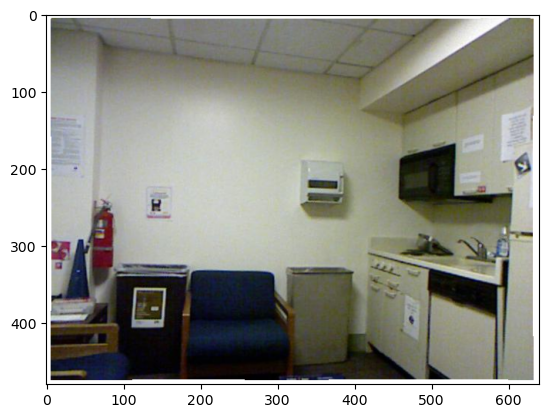

In [22]:
input_img = mpimg.imread(sample_image_path)
imgplot = plt.imshow(input_img)
plt.show()

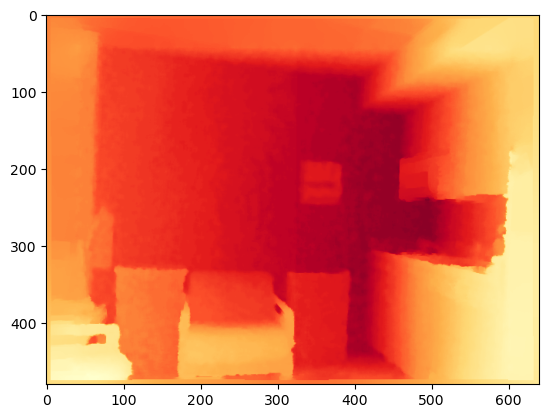

In [25]:
depth_img = mpimg.imread(sample_image_depth_path)
imgplot = plt.imshow(depth_img, cmap='YlOrRd')
plt.show()

In [24]:
depth_img.shape

(480, 640)

In [26]:
input_img.shape

(480, 640, 3)

# Preprocessing & Augmentation

In [28]:
import torch

In [48]:
x = torch.FloatTensor(input_img).permute((2, 0, 1))
print(x.shape)
y = torch.FloatTensor(depth_img)
print(y.shape)

torch.Size([3, 480, 640])
torch.Size([480, 640])


## Filp image and depth map

In [49]:
# filp horizontal
flipped_img = torch.flip(x, dims=(2,))
flipped_depth_map = torch.flip(y, dims=(1,))

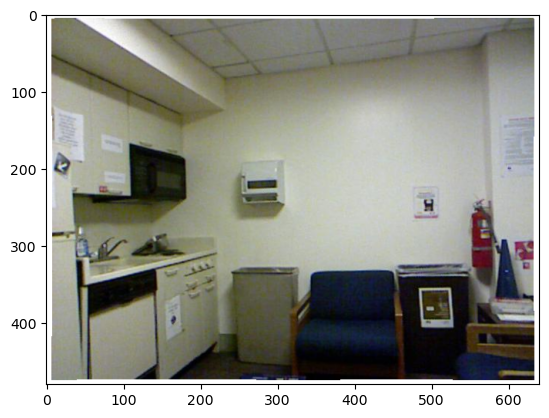

In [50]:
plt.imshow(flipped_img.permute((1, 2, 0)))

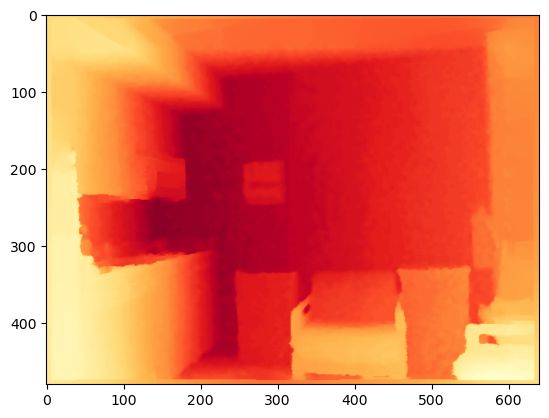

In [52]:
plt.imshow(flipped_depth_map, cmap='YlOrRd')

## Randomly swap color channels

In [71]:
x = torch.FloatTensor(input_img).permute((2, 0, 1))
random_permutation = torch.randperm(3)
print(random_permutation)
x = x[random_permutation, :, :]

tensor([1, 0, 2])


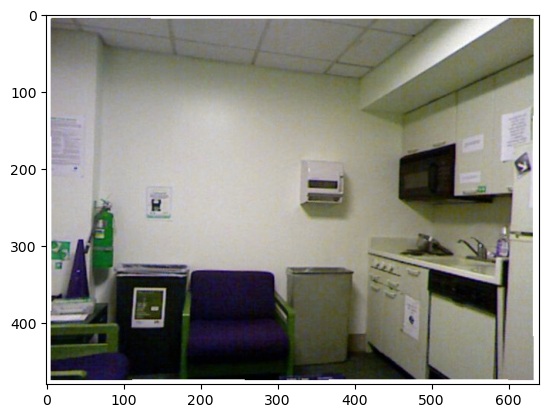

In [72]:
plt.imshow(x.permute((1, 2, 0)))